In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [3]:
dataMaterial24May = pd.read_excel("./../data/Mayo31.xls",sheet_name="Base por material", dtype={'Identificador del Chip': str})
dataMaterial24Jun = pd.read_excel("./../data/Junio30.xls",sheet_name="Base por material", dtype={'Identificador del Chip': str})
dataLector24May = pd.read_excel("./../data/Mayo31.xls",sheet_name="Base por lector", dtype={'Identificador del Chip': str})
dataLector24Jun = pd.read_excel("./../data/Junio30.xls",sheet_name="Base por lector", dtype={'Identificador del Chip': str})

data = pd.concat([dataMaterial24May, dataLector24May, dataMaterial24Jun, dataLector24Jun])

In [170]:
"""
tre = pd.read_csv("./../data/pru.csv",delimiter=';')
ee = tre.iloc[:40]
iio = ee['Identificador del Chip']
iio = iio.fillna(0)
iio = iio.astype(np.int64)
iio
"""
# codigo para mantener la exactitud de los iccids
"""
file_path = './../data/Mayo31.xls'
dff = pd.read_excel(file_path, sheet_name="Base por material", dtype={'Identificador del Chip': str})
uuu = dff.iloc[:40]
uuu['Identificador del Chip']
"""

'\nfile_path = \'./../data/Mayo31.xls\'\ndff = pd.read_excel(file_path, sheet_name="Base por material", dtype={\'Identificador del Chip\': str})\nuuu = dff.iloc[:40]\nuuu[\'Identificador del Chip\']\n'

# LIMPIEZA Y TRANFORMACION DE DATOS

## Initial Validations

In [4]:
required_columns = [    
    'Antiguedad Cedente',
    'Identificador del operador cedente',
    'Cantidad de días de antiguedad',
    'Modalidad segmento del operador cedente',
    'Descripción operador cedente',
    'Fecha desde que el cliente estuvo en operador cedente',
  
    'Modalidad de venta',
    'Claro TV',
    'Internet Fija',
    'Telefonía Fija',
    
    'Tipo documento del vendedor',
    'DNI del dueño de multimarca',
    'Número de documento del vendedor',
    'Flag Login Vendedor',
    'Fecha Registro del dueño del multimarca',
    
    'Mes',
    'Fecha de venta',
    'Identificador del Chip',
    'Serie del lector biométrico móvil',
    'Número de telefono',
    'Flag Recarga',
    'Tipo de operación de venta',
    'Modalidad segmento de venta',
    'Descipción del plan',
    'Número del pedido rerlacionado a la venta',
    'Número de evaluación crediticia',
    'Número de la orden de trabajo',
    'Tipo venta C-CHIP/P-Pack',
    'Identificador del equipo (IMEI)',
    
    'Aplicativo donde se realizó la venta',
    'Canal del punto de venta del material',
    'Plataforma',
    
    'Región asociado al punto de venta del chip',
    'Dpto asociado al punto de venta del chip',
    
    'Razón social del dueño (LECTOR)',
    'RUC del dueño al que se despaño el lector biométrico móvil',
    'Razón social del dueño del chip que realizó la venta (MATERIAL)',
    'RUC del dueño del chip que realizó la venta',
    'Descripción del punto de venta del material',
    'Código del punto de venta del material',

    'Tipo de operación del biométrico',
    'Tipo Val Biométrica',
    'Tipo Venta Biométrico',
    'Usuario de Biometría "Biomovil"',
    'Venta Realizada Por',
]

columnas_faltantes = [col for col in required_columns if col not in data.columns]

if columnas_faltantes:
    print(f"Las siguientes columnas faltan en el DataFrame: {columnas_faltantes}")
else:
    print("Todas las columnas requeridas están presentes.")

Todas las columnas requeridas están presentes.


In [5]:
nulo1 = data['Aplicativo donde se realizó la venta'].isna().sum()
nulo2 = data['Canal del punto de venta del material'].isna().sum()
nulo3 = data['Descripción del punto de venta del material'].isna().sum()
nulo4 = data['Código del punto de venta del material'].isna().sum()
nulo5 = data['Dpto asociado al punto de venta del chip'].isna().sum()
nulo6 = data['Mes'].isna().sum()
nulo7 = data['Modalidad segmento de venta'].isna().sum()
nulo8 = data['Tipo de operación de venta'].isna().sum()
nulo9 = data['Región asociado al punto de venta del chip'].isna().sum()
nulo10 = data['Tipo de operación del biométrico'].isna().sum()
nulo11 = data['Tipo Val Biométrica'].isna().sum()
nulo12 = data['Tipo Venta Biométrico'].isna().sum()
nulo13 = data['Usuario de Biometría "Biomovil"'].isna().sum()
nulo14 = data['Venta Realizada Por'].isna().sum()

print(nulo1+nulo2+nulo3+nulo4+nulo5+nulo6+nulo7+nulo8+nulo9+nulo10+nulo11+nulo12+nulo13+nulo14)

0


## Manage columns

In [6]:
data.rename(columns={
    'Antiguedad Cedente':'CEDENT_ISMORETHAN90DAYS',
    'Identificador del operador cedente':'CEDENT_CODOPERADOR',
    'Cantidad de días de antiguedad':'CEDENT_DIASANTIGUEDAD',
    'Modalidad segmento del operador cedente':'CEDENT_PRODUCT',
    'Descripción operador cedente':'CEDENT_OPERATOR',
    'Fecha desde que el cliente estuvo en operador cedente':'CEDENT_DATE',
    
    'Modalidad de venta':'PLAY',
    'Claro TV':'FIJA_TV',
    'Internet Fija':'FIJA_INTERNET',
    'Telefonía Fija':'FIJA_PHONE',

    'Tipo documento del vendedor':'DOCUMENT_TYPE_SELLER',
    'DNI del dueño de multimarca':'DNI_MM',
    'Número de documento del vendedor':'DOCUMENT_NRO_SELLER',
    'Flag Login Vendedor':'FLAG_LOGIN_SELLER',
    'Fecha Registro del dueño del multimarca':'FECHA_REGISTER_MM',
    
    'Mes':'PERIOD',
    'Fecha de venta':'FECHA_VENTA',
    'Identificador del Chip':'CHIP',
    'Serie del lector biométrico móvil':'BIOMETRIC_SERIE',
    'Número de telefono':'PHONE_NUMBER',
    'Flag Recarga':'RECHARGE',
    'Tipo de operación de venta':'OPE_VENTA',
    'Modalidad segmento de venta':'PRODUCT',
    'Descipción del plan':'PLAN_DESCRIPTION',
    'Número del pedido rerlacionado a la venta':'CONTRATO',
    'Número de evaluación crediticia':'SEC',
    'Número de la orden de trabajo':'SOT',
    'Tipo venta C-CHIP/P-Pack':'TIPO_VENTA',
    'Identificador del equipo (IMEI)':'IMEI',
    
    'Aplicativo donde se realizó la venta':'APP',
    'Canal del punto de venta del material':'CHANNEL',
    'Plataforma':'PLATFORM',

    'Región asociado al punto de venta del chip':'REGION',
    'Dpto asociado al punto de venta del chip':'DEPARTMENT_CHIP',
    
    'Razón social del dueño (LECTOR)':'BIOMETRIC_RAZONSOCIAL',
    'RUC del dueño al que se despaño el lector biométrico móvil':'BIOMETRIC_RUC',
    'Razón social del dueño del chip que realizó la venta (MATERIAL)':'CHIP_RAZONSOCIAL',
    'RUC del dueño del chip que realizó la venta':'CHIP_RUC',
    'Descripción del punto de venta del material':'DAC_CHIP',
    'Código del punto de venta del material':'COD_PDV',
    
    'Tipo de operación del biométrico':'BIOMETRIC_OPE',
    'Tipo Val Biométrica':'BIOMETRIC_VALIDATION',
    'Tipo Venta Biométrico':'BIOMETRIC_OWNER',
    'Usuario de Biometría "Biomovil"':'USER',
    'Venta Realizada Por':'DONE_BY'
}, inplace=True)

In [7]:
index = ['CEDENT_ISMORETHAN90DAYS','CEDENT_CODOPERADOR','CEDENT_DIASANTIGUEDAD','CEDENT_PRODUCT','CEDENT_OPERATOR','CEDENT_DATE',
         'PLAY','FIJA_TV','FIJA_INTERNET','FIJA_PHONE','DOCUMENT_TYPE_SELLER','DNI_MM','DOCUMENT_NRO_SELLER','FLAG_LOGIN_SELLER',
         'FECHA_REGISTER_MM','PERIOD','FECHA_VENTA','CHIP','BIOMETRIC_SERIE','PHONE_NUMBER','RECHARGE','OPE_VENTA','PRODUCT','PLAN_DESCRIPTION',
         'CONTRATO','SEC','SOT','TIPO_VENTA','IMEI','APP','CHANNEL','PLATFORM','REGION','DEPARTMENT_CHIP','BIOMETRIC_RAZONSOCIAL','BIOMETRIC_RUC',
         'CHIP_RAZONSOCIAL','CHIP_RUC','DAC_CHIP','COD_PDV','BIOMETRIC_OPE','BIOMETRIC_VALIDATION','BIOMETRIC_OWNER','USER','DONE_BY']
data = data.reindex(columns=index)

## ***`BOOLEAN`*** casting

In [8]:
data = data.astype({'FIJA_TV':'str','FIJA_INTERNET':'str','FIJA_PHONE':'str','FLAG_LOGIN_SELLER':'str','RECHARGE':'str'})

data['FIJA_TV']=data['FIJA_TV'].replace({'0':''},regex=True)
data['FIJA_TV']=data['FIJA_TV'].replace({'1':'True'},regex=True)

data['FIJA_INTERNET']=data['FIJA_INTERNET'].replace({'0':''},regex=True)
data['FIJA_INTERNET']=data['FIJA_INTERNET'].replace({'1':'True'},regex=True)

data['FIJA_PHONE']=data['FIJA_PHONE'].replace({'0':''},regex=True)
data['FIJA_PHONE']=data['FIJA_PHONE'].replace({'1':'True'},regex=True)

data['FLAG_LOGIN_SELLER']=data['FLAG_LOGIN_SELLER'].replace({'0':''},regex=True)
data['FLAG_LOGIN_SELLER']=data['FLAG_LOGIN_SELLER'].replace({'1':'True'},regex=True)

data['RECHARGE']=data['RECHARGE'].replace({'No':''},regex=True)
data['RECHARGE']=data['RECHARGE'].replace({'Si':'True'},regex=True)

data = data.astype({'FIJA_TV':'bool','FIJA_INTERNET':'bool','FIJA_PHONE':'bool','FLAG_LOGIN_SELLER':'bool','RECHARGE':'bool'})


## ***``OBJECT``*** Casting

### `CEDENT_ISMORETHAN90DAYS` `CEDENT_PRODUCT` `CEDENT_OPERATOR` `PLAY` `DOCUMENT_TYPE_SELLER` `DOCUMENT_NRO_SELLER` `BIOMETRIC_SERIE` `PLAN_DESCRIPTION` `TIPO_VENTA`

In [9]:
data = data.astype({
    'CEDENT_ISMORETHAN90DAYS':'str',
    'CEDENT_PRODUCT':'str',
    'CEDENT_OPERATOR':'str',
    'PLAY':'str',
    'DOCUMENT_TYPE_SELLER':'str',
    'DOCUMENT_NRO_SELLER':'str',
    'BIOMETRIC_SERIE':'str',
    'PLAN_DESCRIPTION':'str',
    'TIPO_VENTA':'str',
    'IMEI':'str',
    'CONTRATO':'str',
    'BIOMETRIC_RAZONSOCIAL':'str',
    'CHIP_RAZONSOCIAL':'str',
    'PLATFORM':'str',
})

data['CEDENT_ISMORETHAN90DAYS']=data['CEDENT_ISMORETHAN90DAYS'].replace({'nan':''},regex=True)
data['CEDENT_PRODUCT']=data['CEDENT_PRODUCT'].replace({'nan':''},regex=True)
data['CEDENT_OPERATOR']=data['CEDENT_OPERATOR'].replace({'nan':''},regex=True)
data['PLAY']=data['PLAY'].replace({'nan':''},regex=True)
data['BIOMETRIC_SERIE']=data['BIOMETRIC_SERIE'].replace({'nan':''},regex=True)
data['PLAN_DESCRIPTION']=data['PLAN_DESCRIPTION'].replace({'nan':''},regex=True)
data['TIPO_VENTA']=data['TIPO_VENTA'].replace({'C':'Chip'},regex=True)
data['TIPO_VENTA']=data['TIPO_VENTA'].replace({'P':'Pack'},regex=True)
data['IMEI']=data['IMEI'].replace({'nan':''},regex=True)
data['BIOMETRIC_RAZONSOCIAL']=data['BIOMETRIC_RAZONSOCIAL'].replace({'nan':''},regex=True)
data['CHIP_RAZONSOCIAL']=data['CHIP_RAZONSOCIAL'].replace({'nan':''},regex=True)
data['PLATFORM']=data['PLATFORM'].replace({'nan':''},regex=True)

### `DNI_MM`

In [10]:
data = data.astype({'DNI_MM':'str'})

data['DNI_MM']=data['DNI_MM'].replace({'nan':'00000000'},regex=True)

data['DNI_MM'] = data['DNI_MM'].astype(float)
data['DNI_MM'] = data['DNI_MM'].round().astype(int)
data['DNI_MM'] = data['DNI_MM'].astype(str)
data['DNI_MM'] = data['DNI_MM'].str.zfill(8)
data['DNI_MM']=data['DNI_MM'].replace({'00000000':''},regex=True)

### `CEDENT_CODOPERADOR` `SEC` `SOT`

In [11]:
data['CEDENT_CODOPERADOR'] = data['CEDENT_CODOPERADOR'].fillna(-1)
data['CEDENT_CODOPERADOR'] = data['CEDENT_CODOPERADOR'].round().astype(int)
data['CEDENT_CODOPERADOR'] = data['CEDENT_CODOPERADOR'].astype(str)
data['CEDENT_CODOPERADOR'] = data['CEDENT_CODOPERADOR'].replace({'-1':''},regex=True)

data['SEC'] = data['SEC'].fillna(-1)
data['SEC'] = data['SEC'].round().astype(int)
data['SEC'] = data['SEC'].astype(str)
data['SEC'] = data['SEC'].replace({'-1':''},regex=True)

data['SOT'] = data['SOT'].fillna(-1)
data['SOT'] = data['SOT'].round().astype(int)
data['SOT'] = data['SOT'].astype(str)
data['SOT'] = data['SOT'].replace({'-1':''},regex=True)

### `RUC`

In [12]:
data['BIOMETRIC_RUC'] = data['BIOMETRIC_RUC'].fillna(-1)
data['BIOMETRIC_RUC'] = data['BIOMETRIC_RUC'].round().astype(np.int64)
data['BIOMETRIC_RUC'] = data['BIOMETRIC_RUC'].astype(str)
data['BIOMETRIC_RUC'] = data['BIOMETRIC_RUC'].replace({'-1':''},regex=True)

data['CHIP_RUC'] = data['CHIP_RUC'].fillna(-1)
data['CHIP_RUC'] = data['CHIP_RUC'].round().astype(np.int64)
data['CHIP_RUC'] = data['CHIP_RUC'].astype(str)
data['CHIP_RUC'] = data['CHIP_RUC'].replace({'-1':''},regex=True)

### `PHONE_NUMBER`

In [13]:
data['PHONE_NUMBER'] = data['PHONE_NUMBER'].astype(float)
data['PHONE_NUMBER'] = data['PHONE_NUMBER'].round().astype(int)
data['PHONE_NUMBER'] = data['PHONE_NUMBER'].astype(str)
data['PHONE_NUMBER'] = data['PHONE_NUMBER'].str.zfill(9)
data['PHONE_NUMBER'] = data['PHONE_NUMBER'].replace({'999999998':'999999999'},regex=True)

## ***`INT`*** Casting

### `CHIP`

In [14]:
data = data.astype({'CHIP':'str'})

data['CHIP']=data['CHIP'].replace({'nan':'0'},regex=True)
data['CHIP'] = data['CHIP'].astype(np.int64)
data['CHIP'] = data['CHIP'].fillna(0)
data['CHIP'] = data['CHIP'].round().astype(np.int64)

### `CEDENT_DIASANTIGUEDAD`

In [15]:
data['CEDENT_DIASANTIGUEDAD'] = data['CEDENT_DIASANTIGUEDAD'].fillna(-1)
data['CEDENT_DIASANTIGUEDAD'] = data['CEDENT_DIASANTIGUEDAD'].round().astype(int)

## ***`DATE`***

In [16]:
data['FECHA_VENTA'] = pd.to_datetime(data['FECHA_VENTA'],format='%Y/%m/%d')
data['FECHA_VENTA'] = data['FECHA_VENTA'].dt.strftime('%d/%m/%Y')
data['FECHA_VENTA'] = pd.to_datetime(data['FECHA_VENTA'], format='%d/%m/%Y')

data['FECHA_REGISTER_MM'] = pd.to_datetime(data['FECHA_REGISTER_MM'],format='%Y/%m/%d')
data['FECHA_REGISTER_MM'] = data['FECHA_REGISTER_MM'].dt.strftime('%d/%m/%Y')
data['FECHA_REGISTER_MM'] = pd.to_datetime(data['FECHA_REGISTER_MM'], format='%d/%m/%Y')

# CEDENT_DATE
data['CEDENT_DATE'].replace('', pd.NaT)#, inplace=True)
data['CEDENT_DATE'] = pd.to_datetime(data['CEDENT_DATE'], format='%Y/%m/%d', errors='coerce')
data['CEDENT_DATE'] = data['CEDENT_DATE'].fillna(pd.Timestamp('2000-01-01'))
data['CEDENT_DATE'] = data['CEDENT_DATE'].dt.strftime('%d/%m/%Y')
data['CEDENT_DATE'] = pd.to_datetime(data['CEDENT_DATE'], format='%d/%m/%Y')

Si CEDENT_DATE es menor que los demás CEDENT es porque no se ha validado los días de antiguedad (no aplica)

## Validaciones

### Valores nulos

In [43]:
print(data['IMEI'].isna().sum())

0


### Valores únicos

In [44]:
print(data['BIOMETRIC_RAZONSOCIAL'].unique())

['Tiptel S.A.C.' 'M.I.D. Servicios Generales E.I.R.L.'
 'Pastrana Jimenez Mariluz Rocio' 'Rem Asociados S.A.C.' ''
 'S & C Soluciones Integrales S.A.C.' 'Pisacom S.A.C' 'Huaytelcoms S.A.C.'
 'Rc. Telecomunicaciones S.A.C.' 'Smartphone Peru S.A.C.'
 'J&H Telekomunicaciones S.A.C.' 'Abcell Telecomunicaciones S.A.C'
 'Mamvi Movil E.I.R.L.' 'Corporacion Jean Paul S.A.C.'
 'Elias Vasquez Yeison Rildo' 'Contelsac Sociedad Anonima Cerrada'
 'Megacell Telecomunicaciones S.A.C.' 'Mega Connection S.A.C.'
 'Inversiones Solano E.I.R.L.' 'Akemitel Eirl'
 'Solotell Comunicaciones S.A.C.' 'Electrovia Sociedad Anonima Cerrada'
 'Nilton Cesar Silva Flores' 'Cellcom Peru S.A.C'
 'Inversiones Ayelen Eirl' 'M & A Comunicaciones E.I.R.L.'
 'Net Axxes S.A.C.' 'Cyctel S.A.C.' 'Grupo De Empresarios Jj S.A.C'
 'Enfocado S.A.C.' 'Masservicios S.A.C.' 'Telsur Comunicaciones S.A.C.'
 'Fava Telecomunicaciones Y Multiserv' 'Odj Telecomunicaciones S.A.C'
 'Mobiles On Line Sac' 'Telecomunicaciones Gys Eirl' 'Akemitel

### Sumar valores

In [45]:
print(data['SOT'].sum())

7075887770925345709937897108273171089608711177437119692571262612708307347083074170830734708307417089609670896096709240887092408870896096708960967092408870924088707606667107218370662863707130217078311170863476707574897072738570758877709253457099378971082731710896087111774371196925712626127083073470830741708307347083074170896096708960967092408870924088708960967089609670924088709240887076066671072183706628637071302170783111708634767075748970727385


## Tablas

In [143]:
data.isna().sum()

CEDENT_ISMORETHAN90DAYS    0
CEDENT_CODOPERADOR         0
CEDENT_DIASANTIGUEDAD      0
CEDENT_PRODUCT             0
CEDENT_OPERATOR            0
CEDENT_DATE                0
PLAY                       0
FIJA_TV                    0
FIJA_INTERNET              0
FIJA_PHONE                 0
DOCUMENT_TYPE_SELLER       0
DNI_MM                     0
DOCUMENT_NRO_SELLER        0
FLAG_LOGIN_SELLER          0
FECHA_REGISTER_MM          0
PERIOD                     0
FECHA_VENTA                0
CHIP                       0
BIOMETRIC_SERIE            0
PHONE_NUMBER               0
RECHARGE                   0
OPE_VENTA                  0
PRODUCT                    0
PLAN_DESCRIPTION           0
CONTRATO                   0
SEC                        0
SOT                        0
TIPO_VENTA                 0
IMEI                       0
APP                        0
CHANNEL                    0
PLATFORM                   0
REGION                     0
DEPARTMENT_CHIP            0
BIOMETRIC_RAZO

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61105 entries, 0 to 17040
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   CEDENT_ISMORETHAN90DAYS  61105 non-null  object        
 1   CEDENT_CODOPERADOR       61105 non-null  object        
 2   CEDENT_DIASANTIGUEDAD    61105 non-null  int32         
 3   CEDENT_PRODUCT           61105 non-null  object        
 4   CEDENT_OPERATOR          61105 non-null  object        
 5   CEDENT_DATE              61105 non-null  datetime64[ns]
 6   PLAY                     61105 non-null  object        
 7   FIJA_TV                  61105 non-null  bool          
 8   FIJA_INTERNET            61105 non-null  bool          
 9   FIJA_PHONE               61105 non-null  bool          
 10  DOCUMENT_TYPE_SELLER     61105 non-null  object        
 11  DNI_MM                   61105 non-null  object        
 12  DOCUMENT_NRO_SELLER      61105 n

In [75]:
data.iloc[11550:11580]

,CEDENT_ISMORETHAN90DAYS,CEDENT_CODOPERADOR,CEDENT_DIASANTIGUEDAD,CEDENT_PRODUCT,CEDENT_OPERATOR,CEDENT_DATE,PLAY,FIJA_TV,FIJA_INTERNET,FIJA_PHONE,DOCUMENT_TYPE_SELLER,DNI_MM,DOCUMENT_NRO_SELLER,FLAG_LOGIN_SELLER,FECHA_REGISTER_MM,PERIOD,FECHA_VENTA,CHIP,BIOMETRIC_SERIE,PHONE_NUMBER,RECHARGE,OPE_VENTA,PRODUCT,PLAN_DESCRIPTION,CONTRATO,SEC,SOT,TIPO_VENTA,IMEI,APP,CHANNEL,PLATFORM,REGION,DEPARTMENT_CHIP,BIOMETRIC_RAZONSOCIAL,BIOMETRIC_RUC,CHIP_RAZONSOCIAL,CHIP_RUC,DAC_CHIP,COD_PDV,BIOMETRIC_OPE,BIOMETRIC_VALIDATION,BIOMETRIC_OWNER,USER,DONE_BY
11550,,,-1,,,01/01/2000,,False,False,False,4,76608746,2382453,False,12/04/2024,202405,25/05/2024,895110163983170304,293692318-2324I004091,913744825,False,Linea Nueva,Prepago,PREPAGO,109121256,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Tiptel Sac,20608475240,Tiptel_Ate,84VB,Biomovil01,Lector,Biometrico Propio,Usrbiomovi,Vendedor Multimarca
11551,,,-1,,,01/01/2000,,False,False,False,1,76608746,2382453,False,12/04/2024,202405,25/05/2024,0,293692318-2324I004091,991846132,True,Biometria Aislada,Prepago,PREPAGO,109128023,,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Tiptel Sac,20608475240,Tiptel_Ate,84VB,Biomovil04,Lector,Biometrico Propio,D99955026,Vendedor Multimarca
11552,,,-1,,,01/01/2000,,False,False,False,1,76608746,2382453,False,12/04/2024,202405,27/05/2024,0,293692318-2324I004091,999999999,False,Biometria Aislada,Prepago,PREPAGO,109197170,6042266,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Tiptel Sac,20608475240,Tiptel_Ate,84VB,Biomovil04,Lector,Biometrico Propio,382027,Vendedor Multimarca
11553,,,-1,,,01/01/2000,,False,False,False,4,76608746,2382453,False,12/04/2024,202405,27/05/2024,895110163088995712,293692318-2324I004091,914004722,False,Linea Nueva,Prepago,PREPAGO,109197629,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Tiptel Sac,20608475240,Tiptel_Ate,84VB,Biomovil01,Lector,Biometrico Propio,Usrbiomovi,Vendedor Multimarca
11554,,,-1,,,01/01/2000,,False,False,False,4,76608746,2382453,False,12/04/2024,202405,27/05/2024,895110163088995712,293692318-2324I004091,914319331,False,Linea Nueva,Prepago,PREPAGO,109200791,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Tiptel Sac,20608475240,Tiptel_Ate,84VB,Biomovil01,Lector,Biometrico Propio,Usrbiomovi,Vendedor Multimarca
11555,,,-1,,,01/01/2000,,False,False,False,4,76608746,2382453,False,12/04/2024,202405,27/05/2024,895110163982403072,293692318-2324I004091,941582029,False,Linea Nueva,Prepago,PREPAGO,109194911,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Tiptel Sac,20608475240,Tiptel_Ate,84VB,Biomovil01,Lector,Biometrico Propio,Usrbiomovi,Vendedor Multimarca
11556,,,-1,,,01/01/2000,,False,False,False,4,76608746,2382453,False,12/04/2024,202405,28/05/2024,895110163982403072,293692318-2324I004091,989376689,False,Linea Nueva,Prepago,PREPAGO,109232588,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Tiptel Sac,20608475240,Tiptel_Ate,84VB,Biomovil01,Lector,Biometrico Propio,Usrbiomovi,Vendedor Multimarca
11557,,,-1,,,01/01/2000,,False,False,False,4,76608746,2382453,False,12/04/2024,202405,28/05/2024,895110163982403072,293692318-2324I004091,967735437,False,Linea Nueva,Prepago,PREPAGO,109238562,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Tiptel Sac,20608475240,Tiptel_Ate,84VB,Biomovil01,Lector,Biometrico Propio,Usrbiomovi,Vendedor Multimarca
11558,,,-1,,,01/01/2000,,False,False,False,4,76608746,2382453,False,12/04/2024,202405,28/05/2024,895110163982403072,293692318-2324I004091,982336094,False,Linea Nueva,Prepago,PREPAGO,109216064,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Tiptel Sac,20608475240,Tiptel_Ate,84VB,Biomovil01,Lector,Biometrico Propio,Usrbiomovi,Vendedor Multimarca
11559,,,-1,,,01/01/2000,,False,False,False,4,76608746,2382453,False,12/04/2024,202405,28/05/2024,895110163983170304,293692318-2324I004091,972485610,False,Linea Nueva,Prepago,PREPAGO,109235735,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,T

In [49]:
data['PHONE_NUMBER'].iloc[1:10]

1    913001387
2    900084924
3    920391699
4    900084924
5    920391699
6    000000000
7    000000000
8    000000000
9    000000000
Name: PHONE_NUMBER, dtype: object

# PROCESAMIENTO DE DATOS

In [17]:
def convertir_fecha(fecha):
    day, month, year = fecha.split('/')
    return f'{year}-{month}-{day}'

In [148]:
#data['OPE_VENTA'].unique() # Biometria Aislada - Fija - Linea Nueva - Portabilidad
#data['PRODUCT'].unique() # Postpago - Prepago


array(['Postpago', 'Prepago'], dtype=object)

In [39]:
month ='2024-06'
product ='Prepago'
ope = 'Linea Nueva'

light_month = data['FECHA_VENTA'].dt.to_period('M') == month
filtered_data_light_month = data[light_month]

light_product = filtered_data_light_month['PRODUCT'] == product
filtered_data_light_product = filtered_data_light_month[light_product]

light_ope = filtered_data_light_product['OPE_VENTA'] == ope
data_for_process = filtered_data_light_product[light_ope]
data_for_process
#uio = data_for_process['CHIP'].unique() #['PHONE_NUMBER'].iloc[130:].unique() #.unique()
#uio
#print(filtered_data.iloc[0:20])

#filtered_data.iloc[5:]

#print(filtered_data)

#mylight = pd.to_datetime(data['FECHA_VENTA']).dt.to_period('M')=="202405"

#print(mylight)

,CEDENT_ISMORETHAN90DAYS,CEDENT_CODOPERADOR,CEDENT_DIASANTIGUEDAD,CEDENT_PRODUCT,CEDENT_OPERATOR,CEDENT_DATE,PLAY,FIJA_TV,FIJA_INTERNET,FIJA_PHONE,DOCUMENT_TYPE_SELLER,DNI_MM,DOCUMENT_NRO_SELLER,FLAG_LOGIN_SELLER,FECHA_REGISTER_MM,PERIOD,FECHA_VENTA,CHIP,BIOMETRIC_SERIE,PHONE_NUMBER,RECHARGE,OPE_VENTA,PRODUCT,PLAN_DESCRIPTION,CONTRATO,SEC,SOT,TIPO_VENTA,IMEI,APP,CHANNEL,PLATFORM,REGION,DEPARTMENT_CHIP,BIOMETRIC_RAZONSOCIAL,BIOMETRIC_RUC,CHIP_RAZONSOCIAL,CHIP_RUC,DAC_CHIP,COD_PDV,BIOMETRIC_OPE,BIOMETRIC_VALIDATION,BIOMETRIC_OWNER,USER,DONE_BY,REPEAT_COUNT
696,,,-1,,,2000-01-01,,False,False,False,1,,47346144,False,2019-12-06,202406,2024-06-12,895110163982402644,293692318-2324I003514,951122384,False,Linea Nueva,Prepago,PREPAGO,109721494,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Tiptel Sac,20608475240,Tiptel_Ate,84VB,Biomovil01,Lector,Biometrico Propio,Usrbiomovi,Vendedor Libre,6
697,,,-1,,,2000-01-01,,False,False,False,1,,47346144,False,2019-12-06,202406,2024-06-12,895110163982400306,293782373-2347I005387,940253470,True,Linea Nueva,Prepago,PREPAGO,109724662,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Tiptel Sac,20608475240,Tiptel_Ate,84VB,Biomovil01,Lector,Biometrico Propio,Usrbiomovi,Vendedor Libre,6
698,,,-1,,,2000-01-01,,False,False,False,1,,47346144,False,2019-12-06,202406,2024-06-13,895110163982400289,293782373-2347I005387,976246460,False,Linea Nueva,Prepago,PREPAGO,109767481,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Tiptel Sac,20608475240,Tiptel_Ate,84VB,Biomovil01,Lector,Biometrico Propio,Usrbiomovi,Vendedor Libre,6
699,,,-1,,,2000-01-01,,False,False,False,1,,47346144,False,2019-12-06,202406,2024-06-13,895110163982400294,293782373-2347I005387,973215221,False,Linea Nueva,Prepago,PREPAGO,109760573,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Tiptel Sac,20608475240,Tiptel_Ate,84VB,Biomovil01,Lector,Biometrico Propio,Usrbiomovi,Vendedor Libre,6
700,,,-1,,,2000-01-01,,False,False,False,1,,47346144,False,2019-12-06,202406,2024-06-13,895110163982400303,293782373-2347I005387,942317264,False,Linea Nueva,Prepago,PREPAGO,109762332,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Tiptel Sac,20608475240,Tiptel_Ate,84VB,Biomovil01,Lector,Biometrico Propio,Usrbiomovi,Vendedor Libre,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16369,,,-1,,,2000-01-01,,False,False,False,1,80644472,80644472,False,2022-06-28,202406,2024-06-20,895110163085172581,293782373-2347I005388,952353309,False,Linea Nueva,Prepago,PREPAGO,109997573,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Tiptel Sac,20608475240,Tiptel_Ate,84VB,Biomovil01,Lector,Biometrico Propio,Usrbiomovi,Dueño Multimarca,2
16370,,,-1,,,2000-01-01,,False,False,False,1,80644472,80644472,False,2022-06-28,202406,2024-06-20,895110163085172593,293782373-2347I005388,973254765,False,Linea Nueva,Prepago,PREPAGO,109996495,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Tiptel Sac,20608475240,Tiptel_Ate,84VB,Biomovil01,Lector,Biometrico Propio,Usrbiomovi,Dueño Multimarca,2
16371,,,-1,,,2000-01-01,,False,False,False,1,80644472,80644472,False,2022-06-28,202406,2024-06-20,895110163983169968,293782373-2347I005388,948774089,False,Linea Nueva,Prepago,PREPAGO,109995794,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Tiptel Sac,20608475240,Tiptel_Ate,84VB,Biomovil01,Lector,Biometrico Propio,Usrbiomovi,Dueño Multimarca,2
16372,,,-1,,,2000-01-01,,False,False,False,1,80644472,80644472,False,2022-06-28,202406,2024-06-27,895110163085172587,293782373-2347I005388,989893468,False,Linea Nueva,Prepago,PREPAGO,110241477,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Tiptel Sac,20608475240,Tiptel_Ate,84VB,Biomovil01,Lector,Biometrico Propio,Usrbiomovi,Dueño Multimarca,2


In [40]:
data_for_process['REPEAT_COUNT'] = data_for_process.groupby('PHONE_NUMBER')['PHONE_NUMBER'].transform('count')
data_unique = data_for_process.drop_duplicates(subset='PHONE_NUMBER', keep='first')
data_unique

C:\Users\Daniel\AppData\Local\Temp\ipykernel_24216\2442461156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_process['REPEAT_COUNT'] = data_for_process.groupby('PHONE_NUMBER')['PHONE_NUMBER'].transform('count')


,CEDENT_ISMORETHAN90DAYS,CEDENT_CODOPERADOR,CEDENT_DIASANTIGUEDAD,CEDENT_PRODUCT,CEDENT_OPERATOR,CEDENT_DATE,PLAY,FIJA_TV,FIJA_INTERNET,FIJA_PHONE,DOCUMENT_TYPE_SELLER,DNI_MM,DOCUMENT_NRO_SELLER,FLAG_LOGIN_SELLER,FECHA_REGISTER_MM,PERIOD,FECHA_VENTA,CHIP,BIOMETRIC_SERIE,PHONE_NUMBER,RECHARGE,OPE_VENTA,PRODUCT,PLAN_DESCRIPTION,CONTRATO,SEC,SOT,TIPO_VENTA,IMEI,APP,CHANNEL,PLATFORM,REGION,DEPARTMENT_CHIP,BIOMETRIC_RAZONSOCIAL,BIOMETRIC_RUC,CHIP_RAZONSOCIAL,CHIP_RUC,DAC_CHIP,COD_PDV,BIOMETRIC_OPE,BIOMETRIC_VALIDATION,BIOMETRIC_OWNER,USER,DONE_BY,REPEAT_COUNT
696,,,-1,,,2000-01-01,,False,False,False,1,,47346144,False,2019-12-06,202406,2024-06-12,895110163982402644,293692318-2324I003514,951122384,False,Linea Nueva,Prepago,PREPAGO,109721494,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Tiptel Sac,20608475240,Tiptel_Ate,84VB,Biomovil01,Lector,Biometrico Propio,Usrbiomovi,Vendedor Libre,6
697,,,-1,,,2000-01-01,,False,False,False,1,,47346144,False,2019-12-06,202406,2024-06-12,895110163982400306,293782373-2347I005387,940253470,True,Linea Nueva,Prepago,PREPAGO,109724662,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Tiptel Sac,20608475240,Tiptel_Ate,84VB,Biomovil01,Lector,Biometrico Propio,Usrbiomovi,Vendedor Libre,6
698,,,-1,,,2000-01-01,,False,False,False,1,,47346144,False,2019-12-06,202406,2024-06-13,895110163982400289,293782373-2347I005387,976246460,False,Linea Nueva,Prepago,PREPAGO,109767481,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Tiptel Sac,20608475240,Tiptel_Ate,84VB,Biomovil01,Lector,Biometrico Propio,Usrbiomovi,Vendedor Libre,6
699,,,-1,,,2000-01-01,,False,False,False,1,,47346144,False,2019-12-06,202406,2024-06-13,895110163982400294,293782373-2347I005387,973215221,False,Linea Nueva,Prepago,PREPAGO,109760573,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Tiptel Sac,20608475240,Tiptel_Ate,84VB,Biomovil01,Lector,Biometrico Propio,Usrbiomovi,Vendedor Libre,6
700,,,-1,,,2000-01-01,,False,False,False,1,,47346144,False,2019-12-06,202406,2024-06-13,895110163982400303,293782373-2347I005387,942317264,False,Linea Nueva,Prepago,PREPAGO,109762332,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Tiptel Sac,20608475240,Tiptel_Ate,84VB,Biomovil01,Lector,Biometrico Propio,Usrbiomovi,Vendedor Libre,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,,,-1,,,2000-01-01,,False,False,False,1,23964707,41926841,False,2020-03-12,202406,2024-06-10,895110163069306140,293692318-2224I009776,970208635,False,Linea Nueva,Prepago,PREPAGO,109669719,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Smartphone Peru Sac,20552700741,Smartphone_D.Lima,A864,Biomovil01,Lector,Otros Biometricos,Usrbiomovi,Vendedor Multimarca,1
2095,,,-1,,,2000-01-01,,False,False,False,4,70196523,2610900,False,2023-10-27,202406,2024-06-05,895110163069306133,293692318-2224I009776,946671362,False,Linea Nueva,Prepago,PREPAGO,109514270,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Smartphone Peru Sac,20552700741,Smartphone_D.Lima,A864,Biomovil01,Lector,Otros Biometricos,Usrbiomovi,Vendedor Multimarca,1
2096,,,-1,,,2000-01-01,,False,False,False,4,70196523,2610900,False,2023-10-27,202406,2024-06-08,895110163069306135,293692318-2224I009776,974816425,True,Linea Nueva,Prepago,PREPAGO,109612007,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Smartphone Peru Sac,20552700741,Smartphone_D.Lima,A864,Biomovil01,Lector,Otros Biometricos,Usrbiomovi,Vendedor Multimarca,1
2097,,,-1,,,2000-01-01,,False,False,False,4,70196523,2610900,False,2023-10-27,202406,2024-06-08,895110163069306137,293692318-2224I009776,972551336,True,Linea Nueva,Prepago,PREPAGO,109593888,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Smartphone Peru Sac,20552700741,Smartphone_D.Lima,A864,Biomovil01,Lector,Otros Biometricos,Usrbiomovi,Vendedor Multimarca,1


In [53]:
#CHIPS
ruc_tp="20608475240"

light_ruc = data_unique['CHIP_RUC'] == ruc_tp
filtered_light_ruc = data_unique[light_ruc]

filtered_light_ruc.shape

(6667, 46)

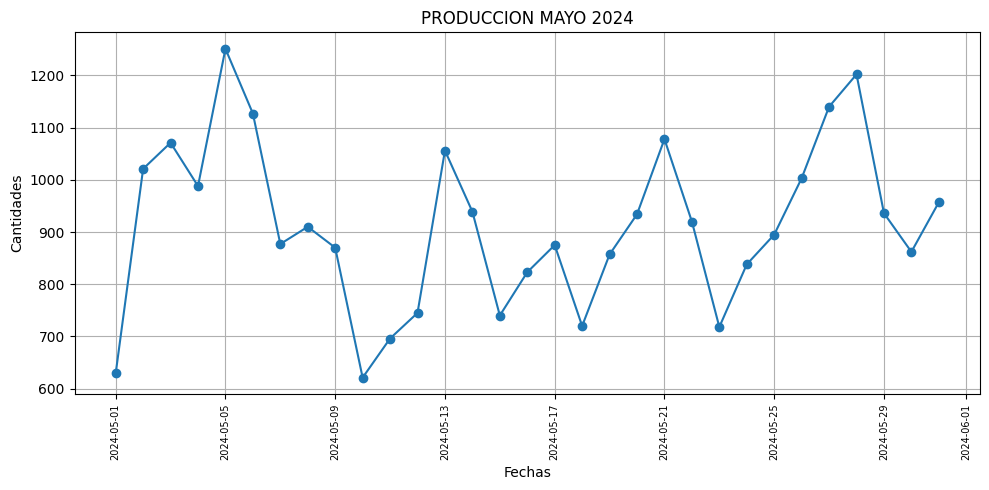

In [51]:
mes = ''

days = data['FECHA_VENTA']
unique_days = days.drop_duplicates()

composed_days = []
light = []

for i,row in unique_days.items():
    light = data['FECHA_VENTA']==row
    final = data[light].shape
    composed_days.append([row,final[0]])

np_composed_days = np.array(composed_days) # np_arr
np_days_qnt = np_composed_days[:,1] # np_arr string
np_arr_qnt = np_days_qnt.astype(np.int32) # np_arr int

np_composed_days_date = np.array([np.datetime64(convertir_fecha(fecha)) for fecha in np_composed_days[:, 0]])
sorted_index = np.argsort(np_composed_days_date)
np_composed_days_date_sorted = np_composed_days_date[sorted_index]
np_composed_days_qnt_sorted = np_arr_qnt[sorted_index]

plt.figure(figsize=(10,5))
plt.plot(np_composed_days_date_sorted,np_composed_days_qnt_sorted, marker='o')
plt.xlabel('Fechas')
plt.ylabel('Cantidades')
plt.title('PRODUCCION MAYO 2024')

plt.grid(True)
plt.xticks(rotation=90, fontsize=7)
plt.tight_layout()

plt.show()

# Configuracion Final

In [ ]:
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
pd.reset_option('display.max_colwidth')